# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Alperen Demirci 
## Student ID:  2220765010

In [139]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explanatory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

### Checking for the missing values 

In [140]:
housing_df.info()

# Storing numerical and categorical indices
list_numerical=[]
list_categorical=[]
for col in housing_df.drop('median_house_value',axis=1).columns:
    if housing_df[col].dtype == 'object':
        list_categorical.append(col)
    else:
        list_numerical.append(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* We can see that columns "total_bedrooms" has some empty entries since it has 20433 values not 20640.
* Let's check the null or nan values for every feature.

In [141]:
print("Feature -- Na Values")
print("---------------------")
for col in housing_df.columns:
    print(col, housing_df[col].isna().sum())   

Feature -- Na Values
---------------------
longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [142]:
print("Feature -- Null Values")
print("---------------------")
for col in housing_df.columns:
    print(col, housing_df[col].isnull().sum())   

Feature -- Null Values
---------------------
longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [143]:
print("Feature -- Different Empty Entry Test")
print("---------------------",end="\n\n")
for col in housing_df.columns:
    print(col, housing_df[col].isin(['NaN']).sum(), "checking for NaN") 
    print(col, housing_df[col].isin(['?']).sum(), "checking for ?")
    print(col, housing_df[col].isin(['null']).sum(), "checking for null")
    print(col, housing_df[col].isin(['NULL']).sum(), "checking for NULL")
    print(col, housing_df[col].isin(['Null']).sum(), "checking for Null")
    print(col, housing_df[col].isin(['na']).sum() , "checking for na")
    print(col, housing_df[col].isin(['NA']).sum(), "checking for NA")
    print(col, housing_df[col].isin(['Na']).sum(), "checking for Na")
    print(col, housing_df[col].isin(['']).sum(), "checking for '' ")
    print(col, housing_df[col].isin([' ']).sum(), "checking for ' '")
    print(col, housing_df[col].isin(['-']).sum(), "checking for -")
    print("\n")


Feature -- Different Empty Entry Test
---------------------

longitude 0 checking for NaN
longitude 0 checking for ?
longitude 0 checking for null
longitude 0 checking for NULL
longitude 0 checking for Null
longitude 0 checking for na
longitude 0 checking for NA
longitude 0 checking for Na
longitude 0 checking for '' 
longitude 0 checking for ' '
longitude 0 checking for -


latitude 0 checking for NaN
latitude 0 checking for ?
latitude 0 checking for null
latitude 0 checking for NULL
latitude 0 checking for Null
latitude 0 checking for na
latitude 0 checking for NA
latitude 0 checking for Na
latitude 0 checking for '' 
latitude 0 checking for ' '
latitude 0 checking for -


housing_median_age 0 checking for NaN
housing_median_age 0 checking for ?
housing_median_age 0 checking for null
housing_median_age 0 checking for NULL
housing_median_age 0 checking for Null
housing_median_age 0 checking for na
housing_median_age 0 checking for NA
housing_median_age 0 checking for Na
housing_median

In [144]:
print("Feature -- Unique Values")
print("---------------------")
for col in housing_df.columns:
    print(col, housing_df[col].unique()) 

Feature -- Unique Values
---------------------
longitude [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.6

* So we have checked the NaN,null,na values for features.
* Now we will check if the feature equals to 0 for numerical values.
* It is important that 0 must mean empty value for that feature.

In [145]:
for col in housing_df.columns:
    print(col, len(housing_df.loc[housing_df[col]==0]))

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


* We can say that only 'total_bedrooms' feature has 207 empty entries.
* In order to continue exploring our data , we need to drop entries with empty values.

In [146]:
for col in housing_df.columns:
    housing_df.drop(housing_df.loc[housing_df[col].isnull()].index,inplace=True)

In [147]:
housing_df.shape

(20433, 10)

In [148]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


* When we check the information table we can say that there exist no null values in our dataframe.
* Now we can continue with plotting.

### Plotting 
* We will plot the distribution of every feature, scatter plot between different features (for correlation identification).

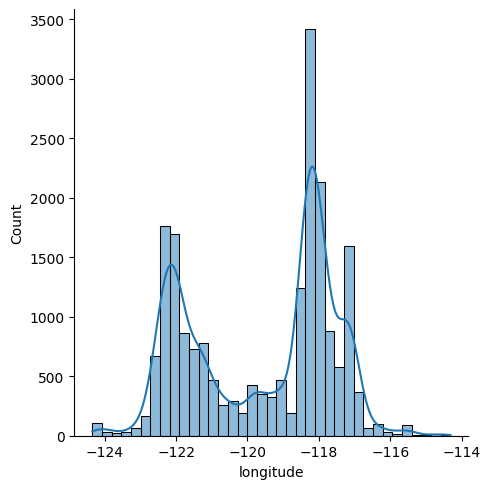

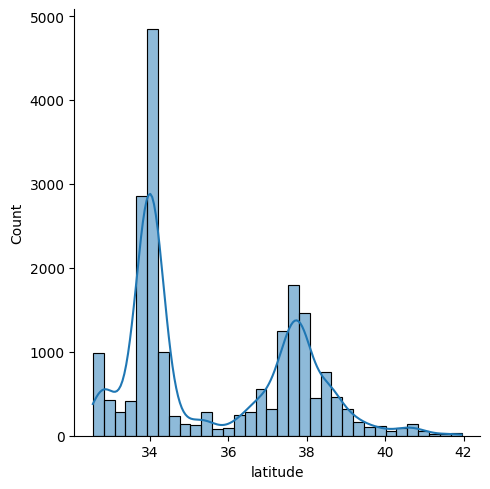

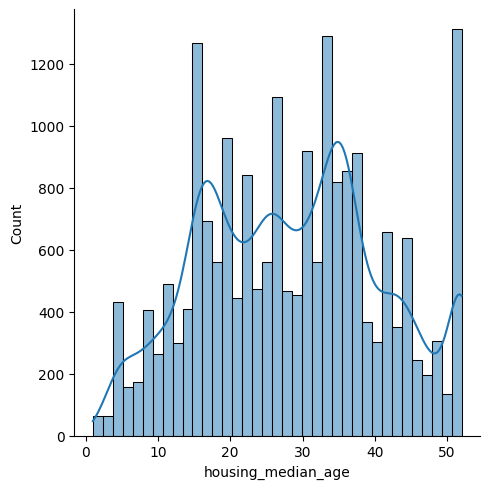

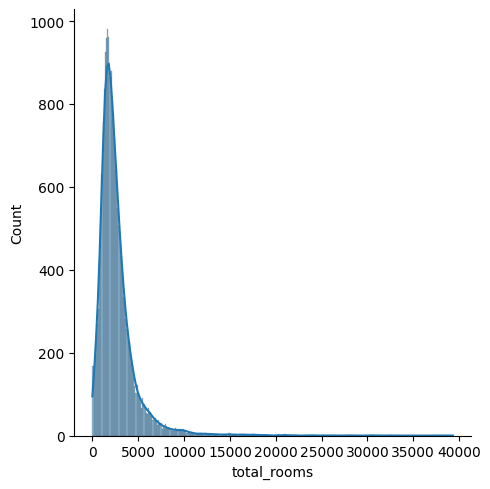

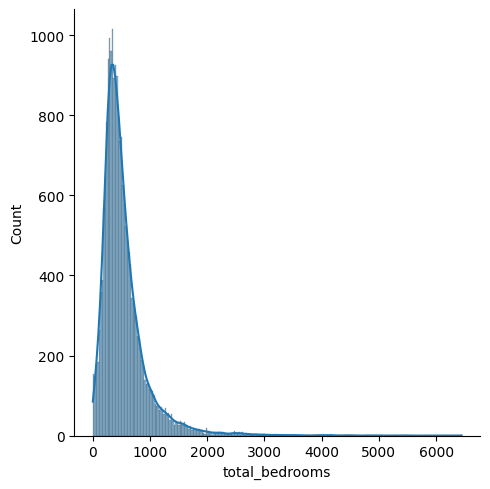

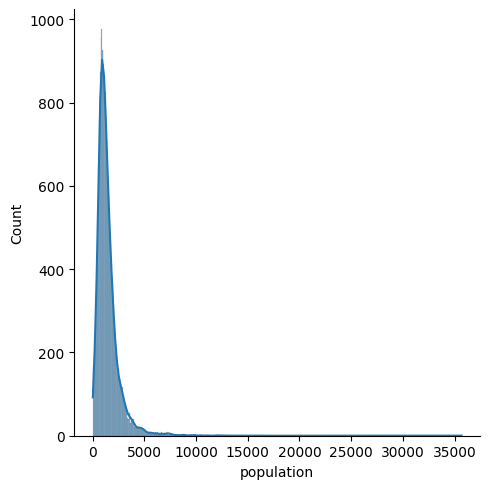

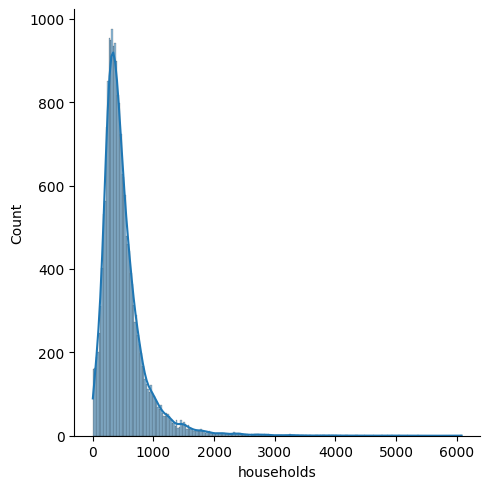

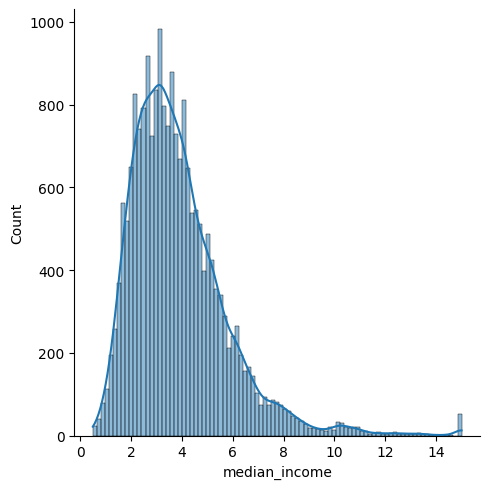

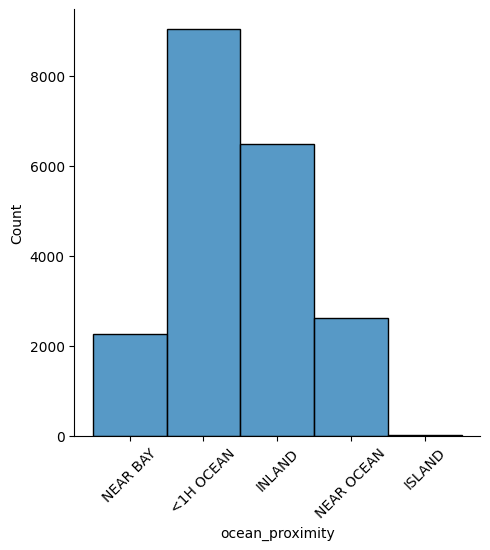

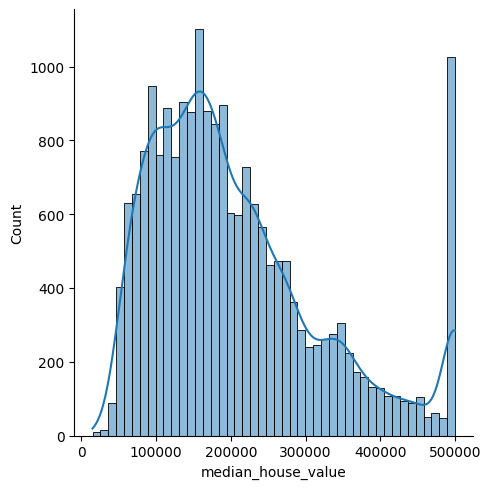

In [149]:
for col in list_numerical:
    sns.displot(housing_df[col], kde=True)
    plt.show()

for col in list_categorical:
    sns.displot(housing_df[col], kde=False)
    plt.xticks(rotation=45)
    plt.show()

sns.displot(housing_df['median_house_value'], kde=True)
plt.show()

### Correlation of target variable (median_house_value) - other features

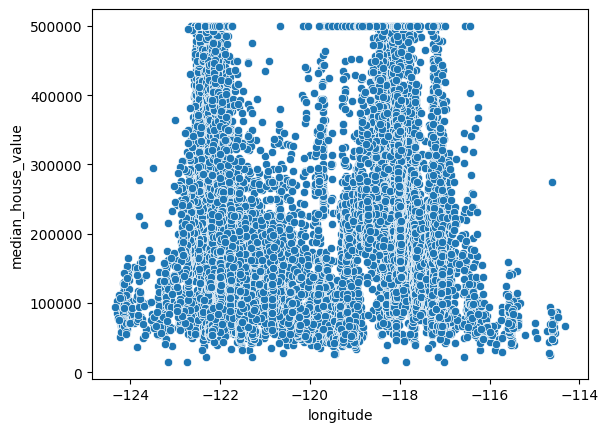

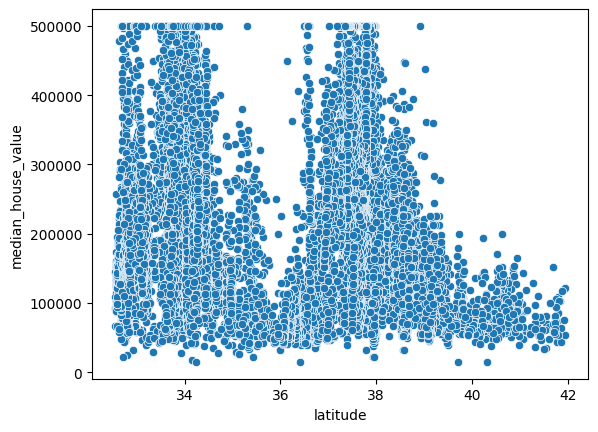

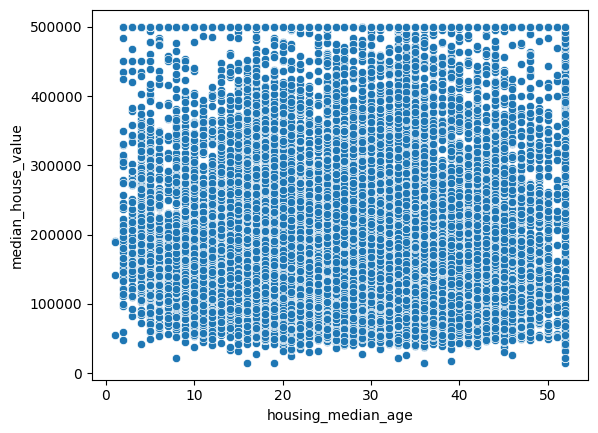

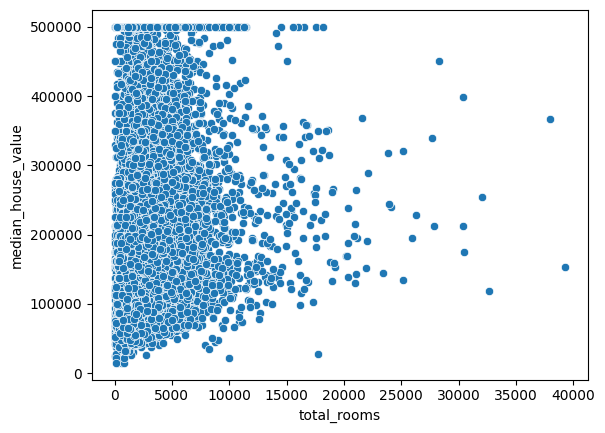

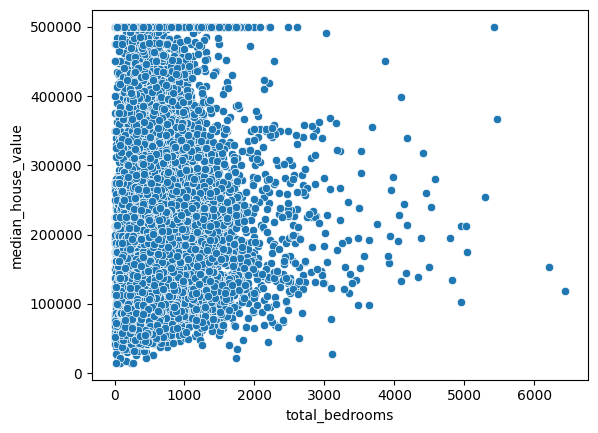

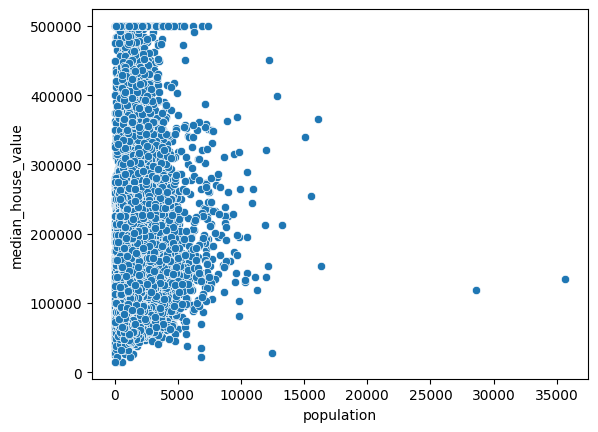

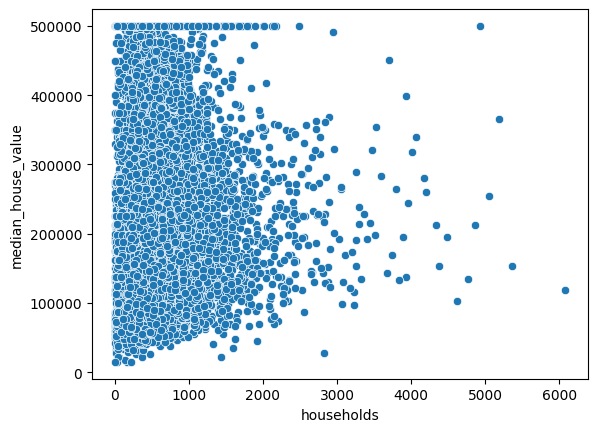

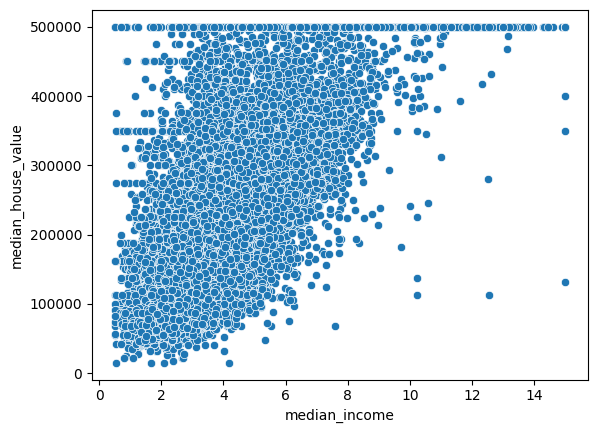

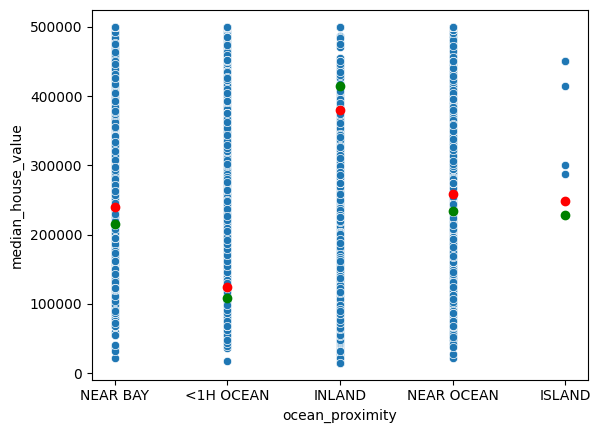

In [150]:
for col in list_numerical:
    sns.scatterplot(x=housing_df[col], y=housing_df['median_house_value'])
    plt.show()

for col in list_categorical:
    sns.scatterplot(x=housing_df[col],y=housing_df['median_house_value'])
    #i put red dot to show the mean of the median_house_value for each category
    plt.scatter(x=housing_df[col].unique(),y=housing_df.groupby(col)['median_house_value'].mean(),color='red')
    #i put green dot to show the median of the median_house_value for each category
    plt.scatter(x=housing_df[col].unique(),y=housing_df.groupby(col)['median_house_value'].median(),color='green')
    
    plt.show()


### HeatMap version of Correlation Matrix

C:\Users\demir\AppData\Local\Temp\ipykernel_6352\2861396838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_df.corr(), annot=True)


<AxesSubplot: >

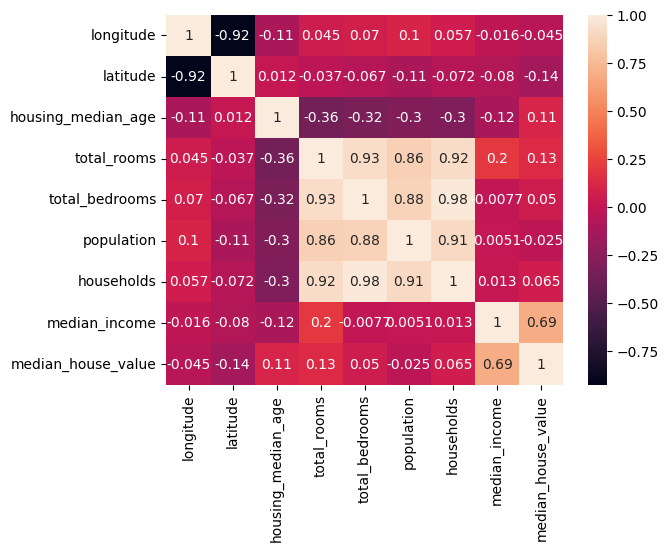

In [151]:
sns.heatmap(housing_df.corr(), annot=True)

# Findings 
### Info. About Dataframe
* There are 8 numerical , 1 categorical features and 1 target variable called "median_house_value".
* It has 20640 entries thus shape of the dataframe is (20640,10).
### Empty or Unknown Entries
* I identified empty values with 'Null','Na','?','-' keywords and builtin pandas isna() and isnull() functions. 
* There are only empty values in 'total_bedrooms' . It has 207 empty entries.
### Distribution of Features
* When we look at the different distributions of data (histograms, barplot and kde plot), we see that there are some plots which look similar.
* total_rooms , total_bedrooms , population , households graphs are all right skewed and more narrow compared to normal distribution.
* Longtitude and latitiude look like bimodal graphs.
* Most of the feature has a distribution graph with positive skew and outliers.
* These outliers distort the shape of the graph , because of that it is hard to comment on them.
### Graph of Target Value - Features
* There exist a significant correlation between target value and median_income.
* Other variables do not have obvious correlation graph with target value.
### Heatmap of Correlation 
* When we check the correlation between features we can see that there exist strong correlation between features : 
1. total_bedrooms - households -> %98
2. total_bedrooms - total_rooms -> %93
3. total_rooms - households -> %92
4. households - population -> %91
5. population - total_bedrooms -> %88
6. population - total_rooms -> %86

* Top 3 correlation between features and target variable : 
1. median_income -> %69
2. total_rooms -> %13
3. housing_median_age -> %11


- total_bedrooms , households , total_rooms , population have a really strong correlation between them.
* This means that these variables can tell a similar information about each other.

- The feature which has the highest linear correlation percentage with target variable is median_income with %69 correlation.
* So if we were to predict median_house_value , it should be beneficial to consider about median_income too.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

## For outlier detection i will use 4 different methods on numerical features.

### 1. Statistical Method 
* This depends on the fact if the data is outside of the range (Median - 1.5 * IQR , Median + 1.5 * IQR) it is called mild outlier.
* If the data is outside of the range (Median - 3 * IQR , Median + 3 * IQR) it is called extreme outlier.

### 2. Boxplot 
* Actually we will still use the method above but it is much easier to see those values on boxplot.

### 3. Z-Score Method
* z_score = (x-mean)/std_deviation
* 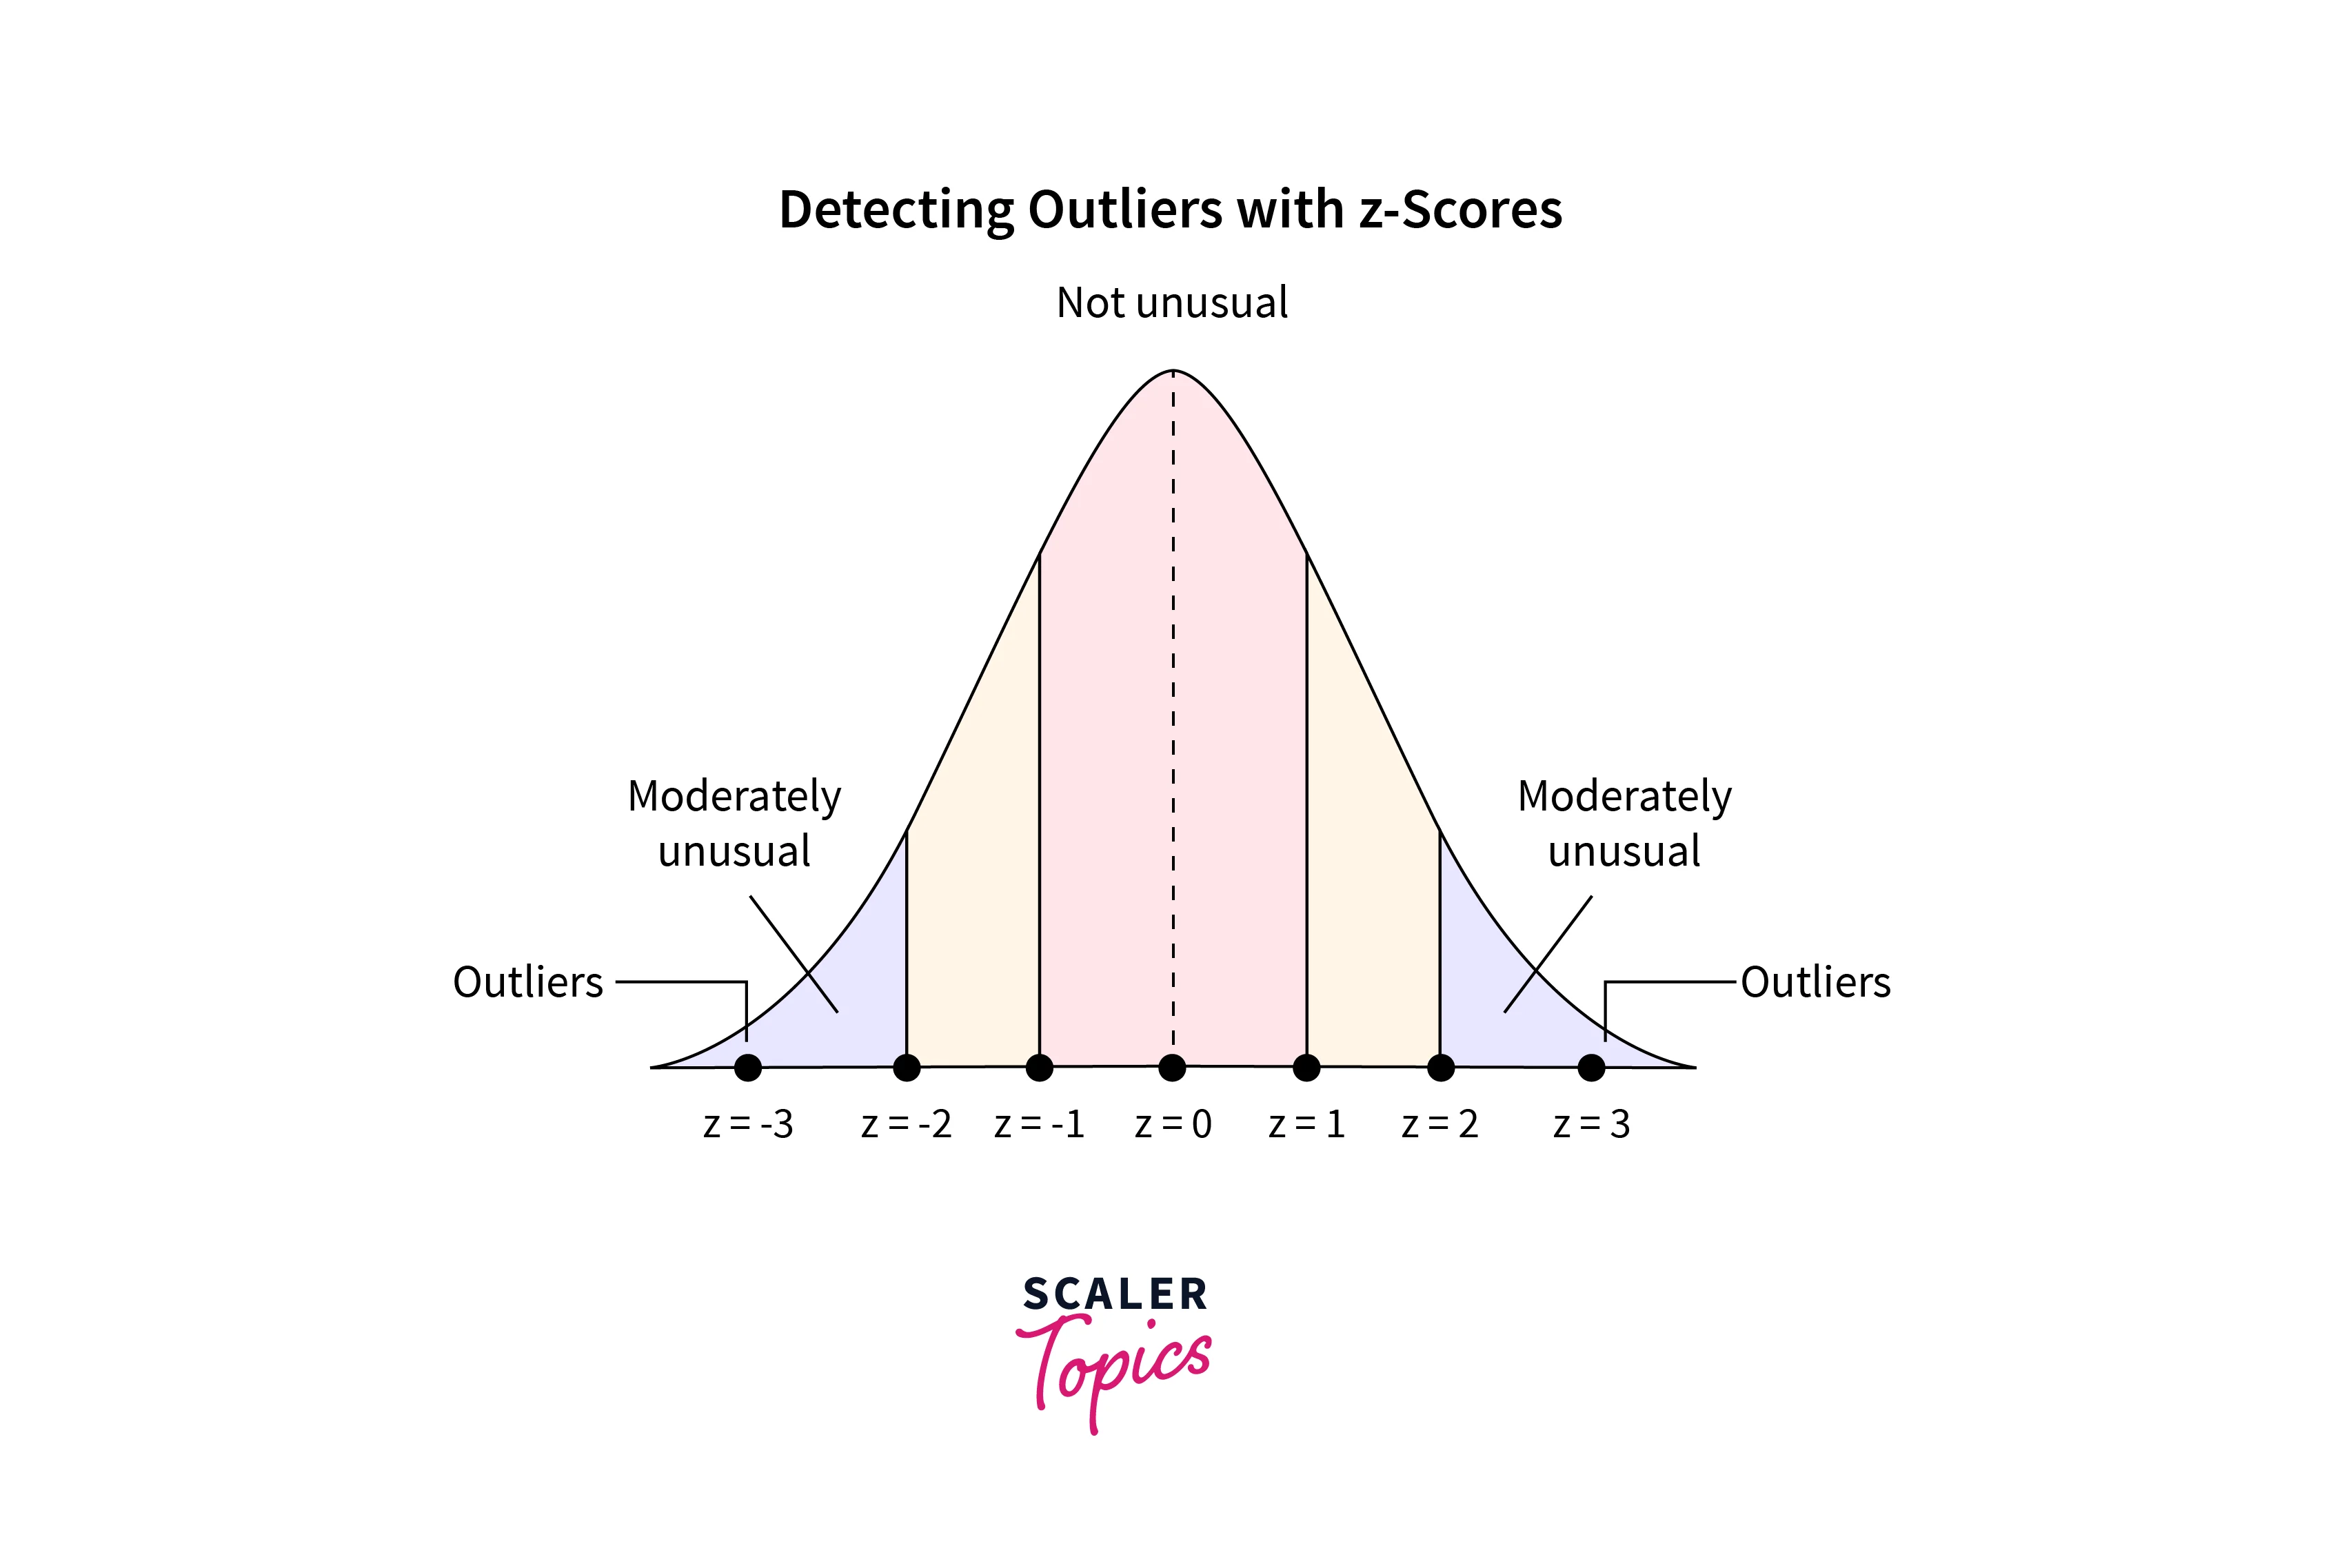
* From this image we can say that values which have z_score > than 2.5 (or 3) or < than -2.5 (or -3) are outliers.

### 4. Standart Deviation Method
* In normal distribution :
1. (mean - 1* std. dev. , mean + 1* std. dev.) -> %68 of the data
2. (mean - 2* std. dev. , mean + 2* std. dev.) -> %95 of the data
3. (mean - 3* std. dev. , mean + 3* std. dev.) -> %99.7 of the data

* By that we can compute outlier counts for 2 and 3 standart deviations from the mean.

## For categorical features :
### Bar Plot 
* Detecting outliers in a categorical variable is harder than numerical variable.
* That being said , i will comment on the distribution of the data.


- I will use all of the methods and comment on them seperately.

### 1. IQR Method

In [152]:
print("Feature -- Outliers",end="\n\n")
for col in list_numerical:
    iqr = housing_df[col].quantile(0.75) - housing_df[col].quantile(0.25)
    mild_upper_limit = housing_df[col].quantile(0.75) + 1.5*iqr
    mild_lower_limit = housing_df[col].quantile(0.25) - 1.5*iqr
    extreme_upper_limit = housing_df[col].quantile(0.75) + 3*iqr
    extreme_lower_limit = housing_df[col].quantile(0.25) - 3*iqr
    print(col, "Mild outlier count : ",len(housing_df.loc[(housing_df[col] > mild_upper_limit) | (housing_df[col] < mild_lower_limit)]))
    print(col, "Extreme outlier count : ",len(housing_df.loc[(housing_df[col] > extreme_upper_limit) | (housing_df[col] < extreme_lower_limit)]))
    print("\n")

Feature -- Outliers

longitude Mild outlier count :  0
longitude Extreme outlier count :  0


latitude Mild outlier count :  0
latitude Extreme outlier count :  0


housing_median_age Mild outlier count :  0
housing_median_age Extreme outlier count :  0


total_rooms Mild outlier count :  1290
total_rooms Extreme outlier count :  493


total_bedrooms Mild outlier count :  1271
total_bedrooms Extreme outlier count :  443


population Mild outlier count :  1190
population Extreme outlier count :  419


households Mild outlier count :  1210
households Extreme outlier count :  418


median_income Mild outlier count :  670
median_income Extreme outlier count :  138




### 2. Boxplot Method

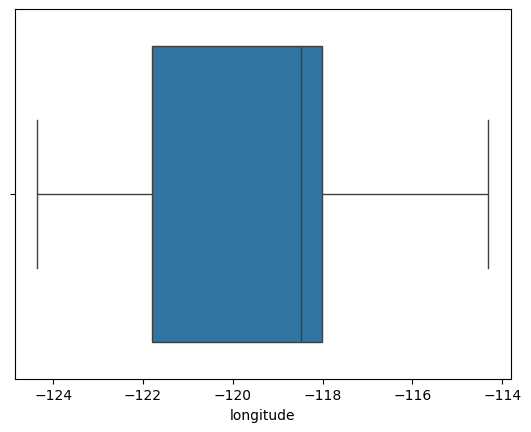

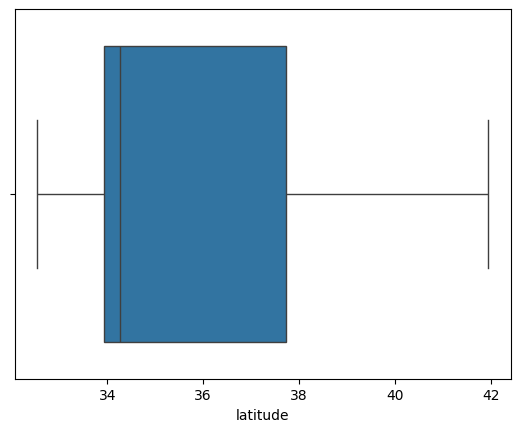

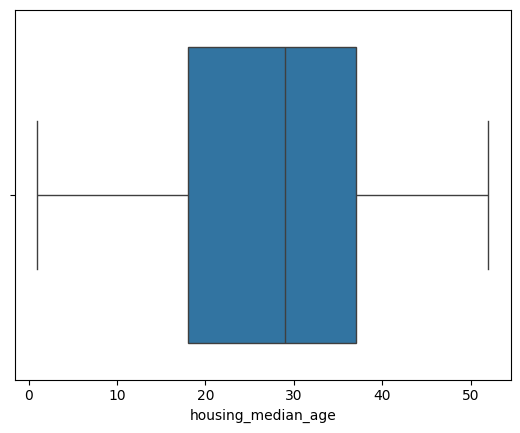

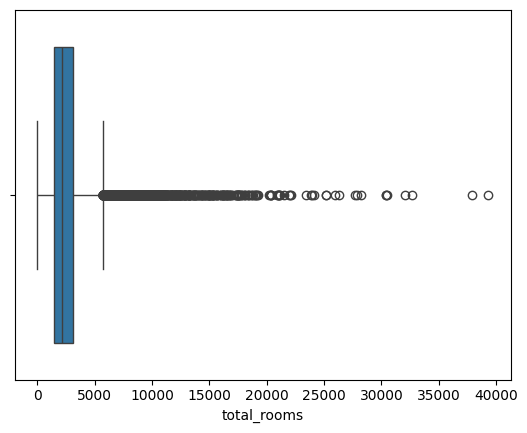

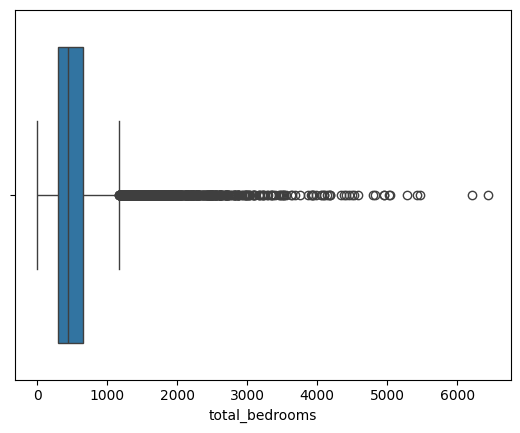

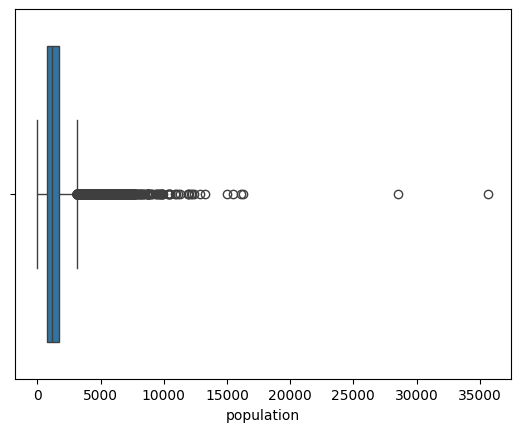

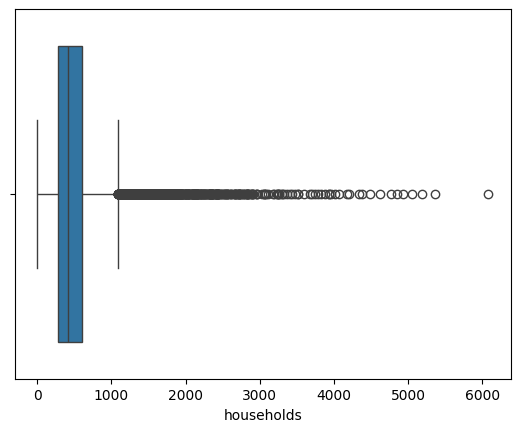

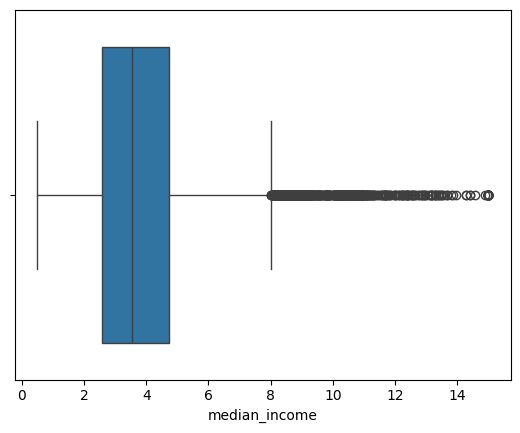

In [153]:
for col in list_numerical:
    sns.boxplot(x=housing_df[col])
    plt.show()

### 3. Z_Score Method

In [154]:
for col in list_numerical:
    mean = housing_df[col].mean()
    std = housing_df[col].std()
    z_score = (housing_df[col] - mean)/std
    print("Current Column : ",col)
    print("Z_Score >2.5 , <-2.5 ###"," Count : ",len(housing_df.loc[(z_score > 3) | (z_score < -3)]))
    print("Z_Score >2.75 , <-2.75 ###"," Count : ",len(housing_df.loc[(z_score > 3) | (z_score < -3)]))
    print("Z_Score >3 , <-3 ###"," Count : ",len(housing_df.loc[(z_score > 3) | (z_score < -3)]))
    print("\n\n")

Current Column :  longitude
Z_Score >2.5 , <-2.5 ###  Count :  0
Z_Score >2.75 , <-2.75 ###  Count :  0
Z_Score >3 , <-3 ###  Count :  0



Current Column :  latitude
Z_Score >2.5 , <-2.5 ###  Count :  0
Z_Score >2.75 , <-2.75 ###  Count :  0
Z_Score >3 , <-3 ###  Count :  0



Current Column :  housing_median_age
Z_Score >2.5 , <-2.5 ###  Count :  0
Z_Score >2.75 , <-2.75 ###  Count :  0
Z_Score >3 , <-3 ###  Count :  0



Current Column :  total_rooms
Z_Score >2.5 , <-2.5 ###  Count :  371
Z_Score >2.75 , <-2.75 ###  Count :  371
Z_Score >3 , <-3 ###  Count :  371



Current Column :  total_bedrooms
Z_Score >2.5 , <-2.5 ###  Count :  368
Z_Score >2.75 , <-2.75 ###  Count :  368
Z_Score >3 , <-3 ###  Count :  368



Current Column :  population
Z_Score >2.5 , <-2.5 ###  Count :  339
Z_Score >2.75 , <-2.75 ###  Count :  339
Z_Score >3 , <-3 ###  Count :  339



Current Column :  households
Z_Score >2.5 , <-2.5 ###  Count :  362
Z_Score >2.75 , <-2.75 ###  Count :  362
Z_Score >3 , <-3 

### 4. Standart Deviation Method

In [155]:
for col in list_numerical:
    std = housing_df[col].std()
    mean = housing_df[col].mean()
    print("Current Column : ",col)
    print("(Mean - 3*std , Mean + 3*std) ###"," Count : ",len(housing_df.loc[(housing_df[col] > mean+3*std)])+len(housing_df.loc[(housing_df[col] < mean-3*std)]))

    print("\n")

Current Column :  longitude
(Mean - 3*std , Mean + 3*std) ###  Count :  0


Current Column :  latitude
(Mean - 3*std , Mean + 3*std) ###  Count :  0


Current Column :  housing_median_age
(Mean - 3*std , Mean + 3*std) ###  Count :  0


Current Column :  total_rooms
(Mean - 3*std , Mean + 3*std) ###  Count :  371


Current Column :  total_bedrooms
(Mean - 3*std , Mean + 3*std) ###  Count :  368


Current Column :  population
(Mean - 3*std , Mean + 3*std) ###  Count :  339


Current Column :  households
(Mean - 3*std , Mean + 3*std) ###  Count :  362


Current Column :  median_income
(Mean - 3*std , Mean + 3*std) ###  Count :  340




In [156]:
for col in list_categorical:
    print(100*housing_df[col].value_counts(normalize=True))

<1H OCEAN     44.212793
INLAND        31.791709
NEAR OCEAN    12.861547
NEAR BAY      11.109480
ISLAND         0.024470
Name: ocean_proximity, dtype: float64


## Result 
* I have tried 4 different techniques for outlier detection : Boxplot , IQR , Z_Score ,Standart Deviation.

### IQR 
* The interquantile range method gave me this output:

total_rooms Mild outlier count :  1287

total_bedrooms Mild outlier count :  1271

population Mild outlier count :  1196

households Mild outlier count :  1220

median_income Mild outlier count :  681

median_house_value Mild outlier count :  1071

* If we check out Mild outlier count which we will use, we can say that IQR method has found more outliers compared to other methods.


### Z-Score 
* The Z-Score method gave me this output:

Current Column :  total_rooms
Z_Score >3 , <-3 ###  Count :  373

Current Column :  total_bedrooms
Z_Score >3 , <-3 ###  Count :  368

Current Column :  population
Z_Score >3 , <-3 ###  Count :  342

Current Column :  households
Z_Score >3 , <-3 ###  Count :  363

Current Column :  median_income
Z_Score >3 , <-3 ###  Count :  345


### Standart Deviation Method 
* The Standart Deviation Method gave me this output:

Current Column :  total_rooms
(Mean - 3*std , Mean + 3*std) ###  Count :  373

Current Column :  total_bedrooms
(Mean - 3*std , Mean + 3*std) ###  Count :  368

Current Column :  population
(Mean - 3*std , Mean + 3*std) ###  Count :  342

Current Column :  households
(Mean - 3*std , Mean + 3*std) ###  Count :  363

Current Column :  median_income
(Mean - 3*std , Mean + 3*std) ###  Count :  345

* These values are the same with Z-Score Methods' outlier counts.

### Percentage of Categories
* Output of categorical percentages for each category :

<1H OCEAN     44.212793

INLAND        31.791709

NEAR OCEAN    12.861547

NEAR BAY      11.109480

ISLAND         0.024470

Name: ocean_proximity, dtype: float64


## Comments 
1. I found out that both Standart Deviation Method and Z_Score tells the same thing , how the data is far from the mean in terms of standart deviation.
2. Here is the issue with Z_Score or Standart Deviation , in order to use these methods effectively our distribution must be normal.
Otherwise we would get erroneous detections of outliers.

* That's why i will prefer the IQR which is a simple statistical method.

1. For categorical variables there exists a category with a very small percentage compared to other categories.
* 'ISLAND' category has a percentage of %0.02 , that's called an outlier since it doesn't belong to %95 (even %99.7) of the general distribution.

* As a result , I identify outlier entries which include category 'ISLAND' .


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

### First we should define a function which retrieves all the outliers using IQR(our selected method on the section above).

In [157]:
def get_outlier_indices_iqr(df, col , extreme=False):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    outlier_lower_limit=0
    outlier_upper_limit=0
    if extreme:
        outlier_upper_limit = df[col].quantile(0.75) + 3*iqr
        outlier_lower_limit = df[col].quantile(0.25) - 3*iqr
    else:
        outlier_upper_limit = df[col].quantile(0.75) + 1.5*iqr
        outlier_lower_limit = df[col].quantile(0.25) - 1.5*iqr
    outlier_indices = df.loc[(df[col] > outlier_upper_limit) | (df[col] < outlier_lower_limit)].index

    return outlier_indices

### 1. "Keep the dataset as is"... as you wish i will use the original dataset for this.

### 2. Outlier Removal

In [158]:
df_without_outliers = housing_df.copy()
for col in list_numerical:
    outlier_indices = get_outlier_indices_iqr(df_without_outliers,col)
    df_without_outliers.drop(outlier_indices,inplace=True)

In [159]:
outlier_indices = df_without_outliers.loc[df_without_outliers['ocean_proximity'] == 'ISLAND'].index
df_without_outliers.drop(outlier_indices,inplace=True)

### 3. Mean Imputation

In [160]:
df_mean_imputed = housing_df.copy()
for col in list_numerical:
    outlier_indices = get_outlier_indices_iqr(df_mean_imputed,col)
    df_mean_imputed.loc[outlier_indices,col] = df_mean_imputed[col].mean()

In [161]:
outlier_indices = df_mean_imputed.loc[df_mean_imputed['ocean_proximity'] == 'ISLAND'].index
df_mean_imputed.loc[df_mean_imputed['ocean_proximity'] == 'ISLAND','ocean_proximity'] = df_mean_imputed['ocean_proximity'].mode()[0] #'<1H OCEAN'

### 4. Median Imputation

In [162]:
df_median_imputed = housing_df.copy()
for col in list_numerical:
    outlier_indices = get_outlier_indices_iqr(df_median_imputed,col)
    df_median_imputed.loc[outlier_indices,col] = df_median_imputed[col].median()

In [163]:
outlier_indices = df_median_imputed.loc[df_median_imputed['ocean_proximity'] == 'ISLAND'].index
df_median_imputed.loc[df_median_imputed['ocean_proximity'] == 'ISLAND','ocean_proximity'] = df_median_imputed['ocean_proximity'].mode()[0]

* Putting 4 dataframes into a list because it would be easier for the next step.

In [164]:
list_dfs = [df_without_outliers,df_mean_imputed,df_median_imputed,housing_df]

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [165]:
labels = ['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']
weights = [0.2,0.4,0.6,0.8,1.0]

dict_encode = dict(zip(labels,weights))

for df in list_dfs:
    df['ocean_proximity'] = df['ocean_proximity'].map(dict_encode)
    

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [166]:
def custom_tt_split(df, target,test_size=0.30, random_state=-1):
    if test_size < 0 or test_size > 1:
        raise ValueError("Test size must be a percentage between 0 and 1")
    elif test_size == 0 or len(df) == 0:
        raise ValueError("Dataframe must contain more than 0 rows")
    else:
        y = df[target]
        X = df.drop(target,axis=1)
        #initializing the size of the test set
        len_test = int(len(df) * test_size)
        
        #creating a list of all indices in the dataframe
        all_indices = list(range(len(df)))
        
        #setting the random seed if the random seed has given in the function call.
        if random_state != -1:
            random.seed(random_state)
        else:
            random.seed()
        
        #randomly selecting the indices for the test set
        test_indices = random.sample(all_indices, len_test)

        #creating the train set by obtaining the set difference of all the indices and the test indices
        train_indices = list(set(all_indices) - set(test_indices))

        #returning the train and test sets
        return X.iloc[train_indices], y.iloc[train_indices] , X.iloc[test_indices], y.iloc[test_indices]
    

# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [167]:
#Splitting the dataset into train and test sets
X_train_df_raw,y_train_df_raw, X_test_df_raw,y_test_df_raw = custom_tt_split(housing_df,target='median_house_value', test_size=0.30, random_state=42)
X_train_df_dropped,y_train_df_dropped, X_test_df_dropped,y_test_df_dropped = custom_tt_split(df_without_outliers,target='median_house_value', test_size=0.30, random_state=42)
X_train_df_mean,y_train_df_mean, X_test_df_mean,y_test_df_mean = custom_tt_split(df_mean_imputed,target='median_house_value', test_size=0.30, random_state=42)
X_train_df_median,y_train_df_median, X_test_df_median,y_test_df_median = custom_tt_split(df_median_imputed,target='median_house_value', test_size=0.30, random_state=42)

In [168]:
list_X_train = [X_train_df_raw,X_train_df_dropped,X_train_df_mean,X_train_df_median]
list_y_train = [y_train_df_raw,y_train_df_dropped,y_train_df_mean,y_train_df_median]
list_X_test = [X_test_df_raw,X_test_df_dropped,X_test_df_mean,X_test_df_median]
list_y_test = [y_test_df_raw,y_test_df_dropped,y_test_df_mean,y_test_df_median]

In [169]:
import sklearn

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [170]:
def get_model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    return mse, r2

Data :  0
Min MSE :  94436.02062456653
Min MSE 'k' hyperparam. :  18
Max R2 :  0.34205882690862277


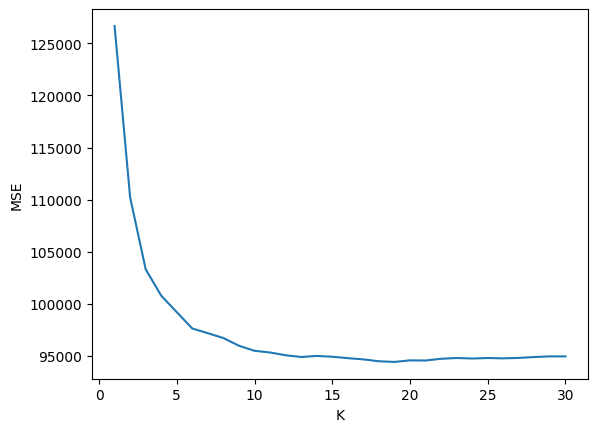

Data :  1
Min MSE :  94791.44612156077
Min MSE 'k' hyperparam. :  29
Max R2 :  0.20609539158620171


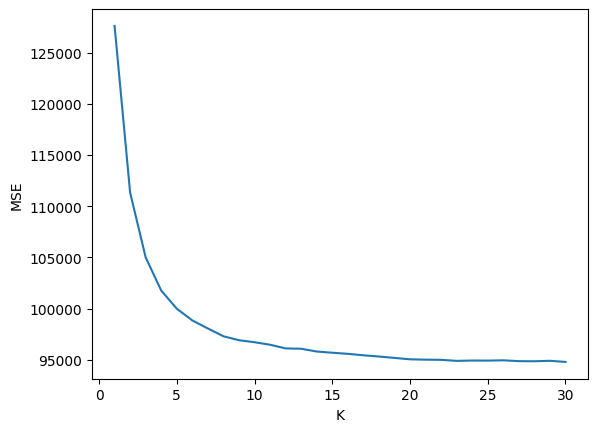

Data :  2
Min MSE :  96321.89920959224
Min MSE 'k' hyperparam. :  18
Max R2 :  0.3155183932368745


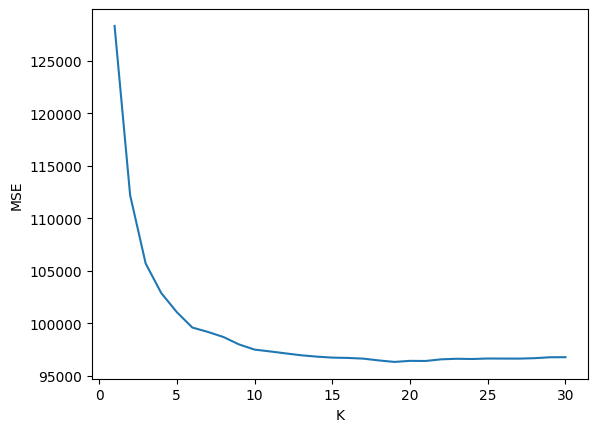

Data :  3
Min MSE :  96087.83960722834
Min MSE 'k' hyperparam. :  18
Max R2 :  0.3188408950076378


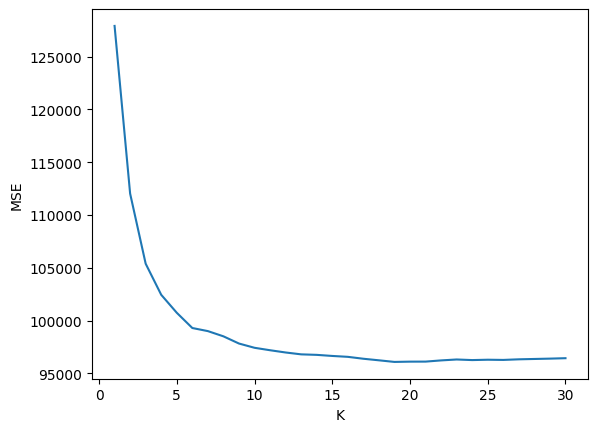

In [171]:
for j in range(4):
    list_mse = []
    list_r2 = []
    for i in range(1,31):
        knn = KNeighborsRegressor(n_neighbors=i)
        mse, r2 = get_model_performance(knn,list_X_train[j],list_y_train[j],list_X_test[j],list_y_test[j])
        list_mse.append(mse)
        list_r2.append(r2)
    
    print("Data : ",j)
    print("Min MSE : ",min(list_mse))
    print("Min MSE 'k' hyperparam. : ",list_mse.index(min(list_mse)))
    print("Max R2 : ",list_r2[list_mse.index(min(list_mse))])
    plt.plot(range(1,31),list_mse)
    plt.xlabel("K")
    plt.ylabel("MSE")
    plt.show()


## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

### Since we have already splitted the data above in the KNN Regression part, there is no need to do this again.

In [172]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for j in range(4):
    mse, r2 = get_model_performance(lr,list_X_train[j],list_y_train[j],list_X_test[j],list_y_test[j])
    print("Data : ",j)
    print("MSE : ",mse)
    print("R2 : ",r2)
    print("\n")

Data :  0
MSE :  68694.29904796102
R2 :  0.6518606606192258


Data :  1
MSE :  66634.6867956419
R2 :  0.607688764008832


Data :  2
MSE :  81395.12822618535
R2 :  0.5112255097375721


Data :  3
MSE :  83193.19327420066
R2 :  0.4893923735690495




## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

\< double click and insert answer here \>

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices